In [45]:
from tensorflow.keras.layers import Normalization,Dense,InputLayer
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
#importar datos
train = pd.read_csv('train.csv')

In [29]:
#Exploracion
train.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [31]:
train.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [32]:
train.describe()

v.id    on road old  on road now        years             km  \
count  1000.000000    1000.000000    1000.0000  1000.000000    1000.000000   
mean    500.500000  601648.286000  799131.3970     4.561000  100274.430000   
std     288.819436   58407.246204   57028.9502     1.719079   29150.463233   
min       1.000000  500265.000000  700018.0000     2.000000   50324.000000   
25%     250.750000  548860.500000  750997.7500     3.000000   74367.500000   
50%     500.500000  601568.000000  798168.0000     5.000000  100139.500000   
75%     750.250000  652267.250000  847563.2500     6.000000  125048.000000   
max    1000.000000  699859.000000  899797.0000     7.000000  149902.000000   

            rating    condition      economy   top speed          hp  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.00000   
mean      2.988000     5.592000    11.625000   166.89300    84.54600   
std       1.402791     2.824449     2.230549    19.28838    20.51694   
min       1.000000     1.000000     8.000000   135.00000    50.00000   
25%       2.000000     3.000000    10.000000   150.00000    67.00000   
50%       3.000000     6.000000    12.000000   166.00000    84.00000   
75%       4.000000     8.000000    13.000000   184.00000   102.00000   
max       5.000000    10.000000    15.000000   200.00000   120.00000   

            torque  current price  
count  1000.000000     1000.00000  
mean    103.423000   308520.24250  
std      21.058716   126073.25915  
min      68.000000    28226.50000  
25%      85.000000   206871.75000  
50%     104.000000   306717.75000  
75%     121.000000   414260.87500  
max     140.000000   584267.50000

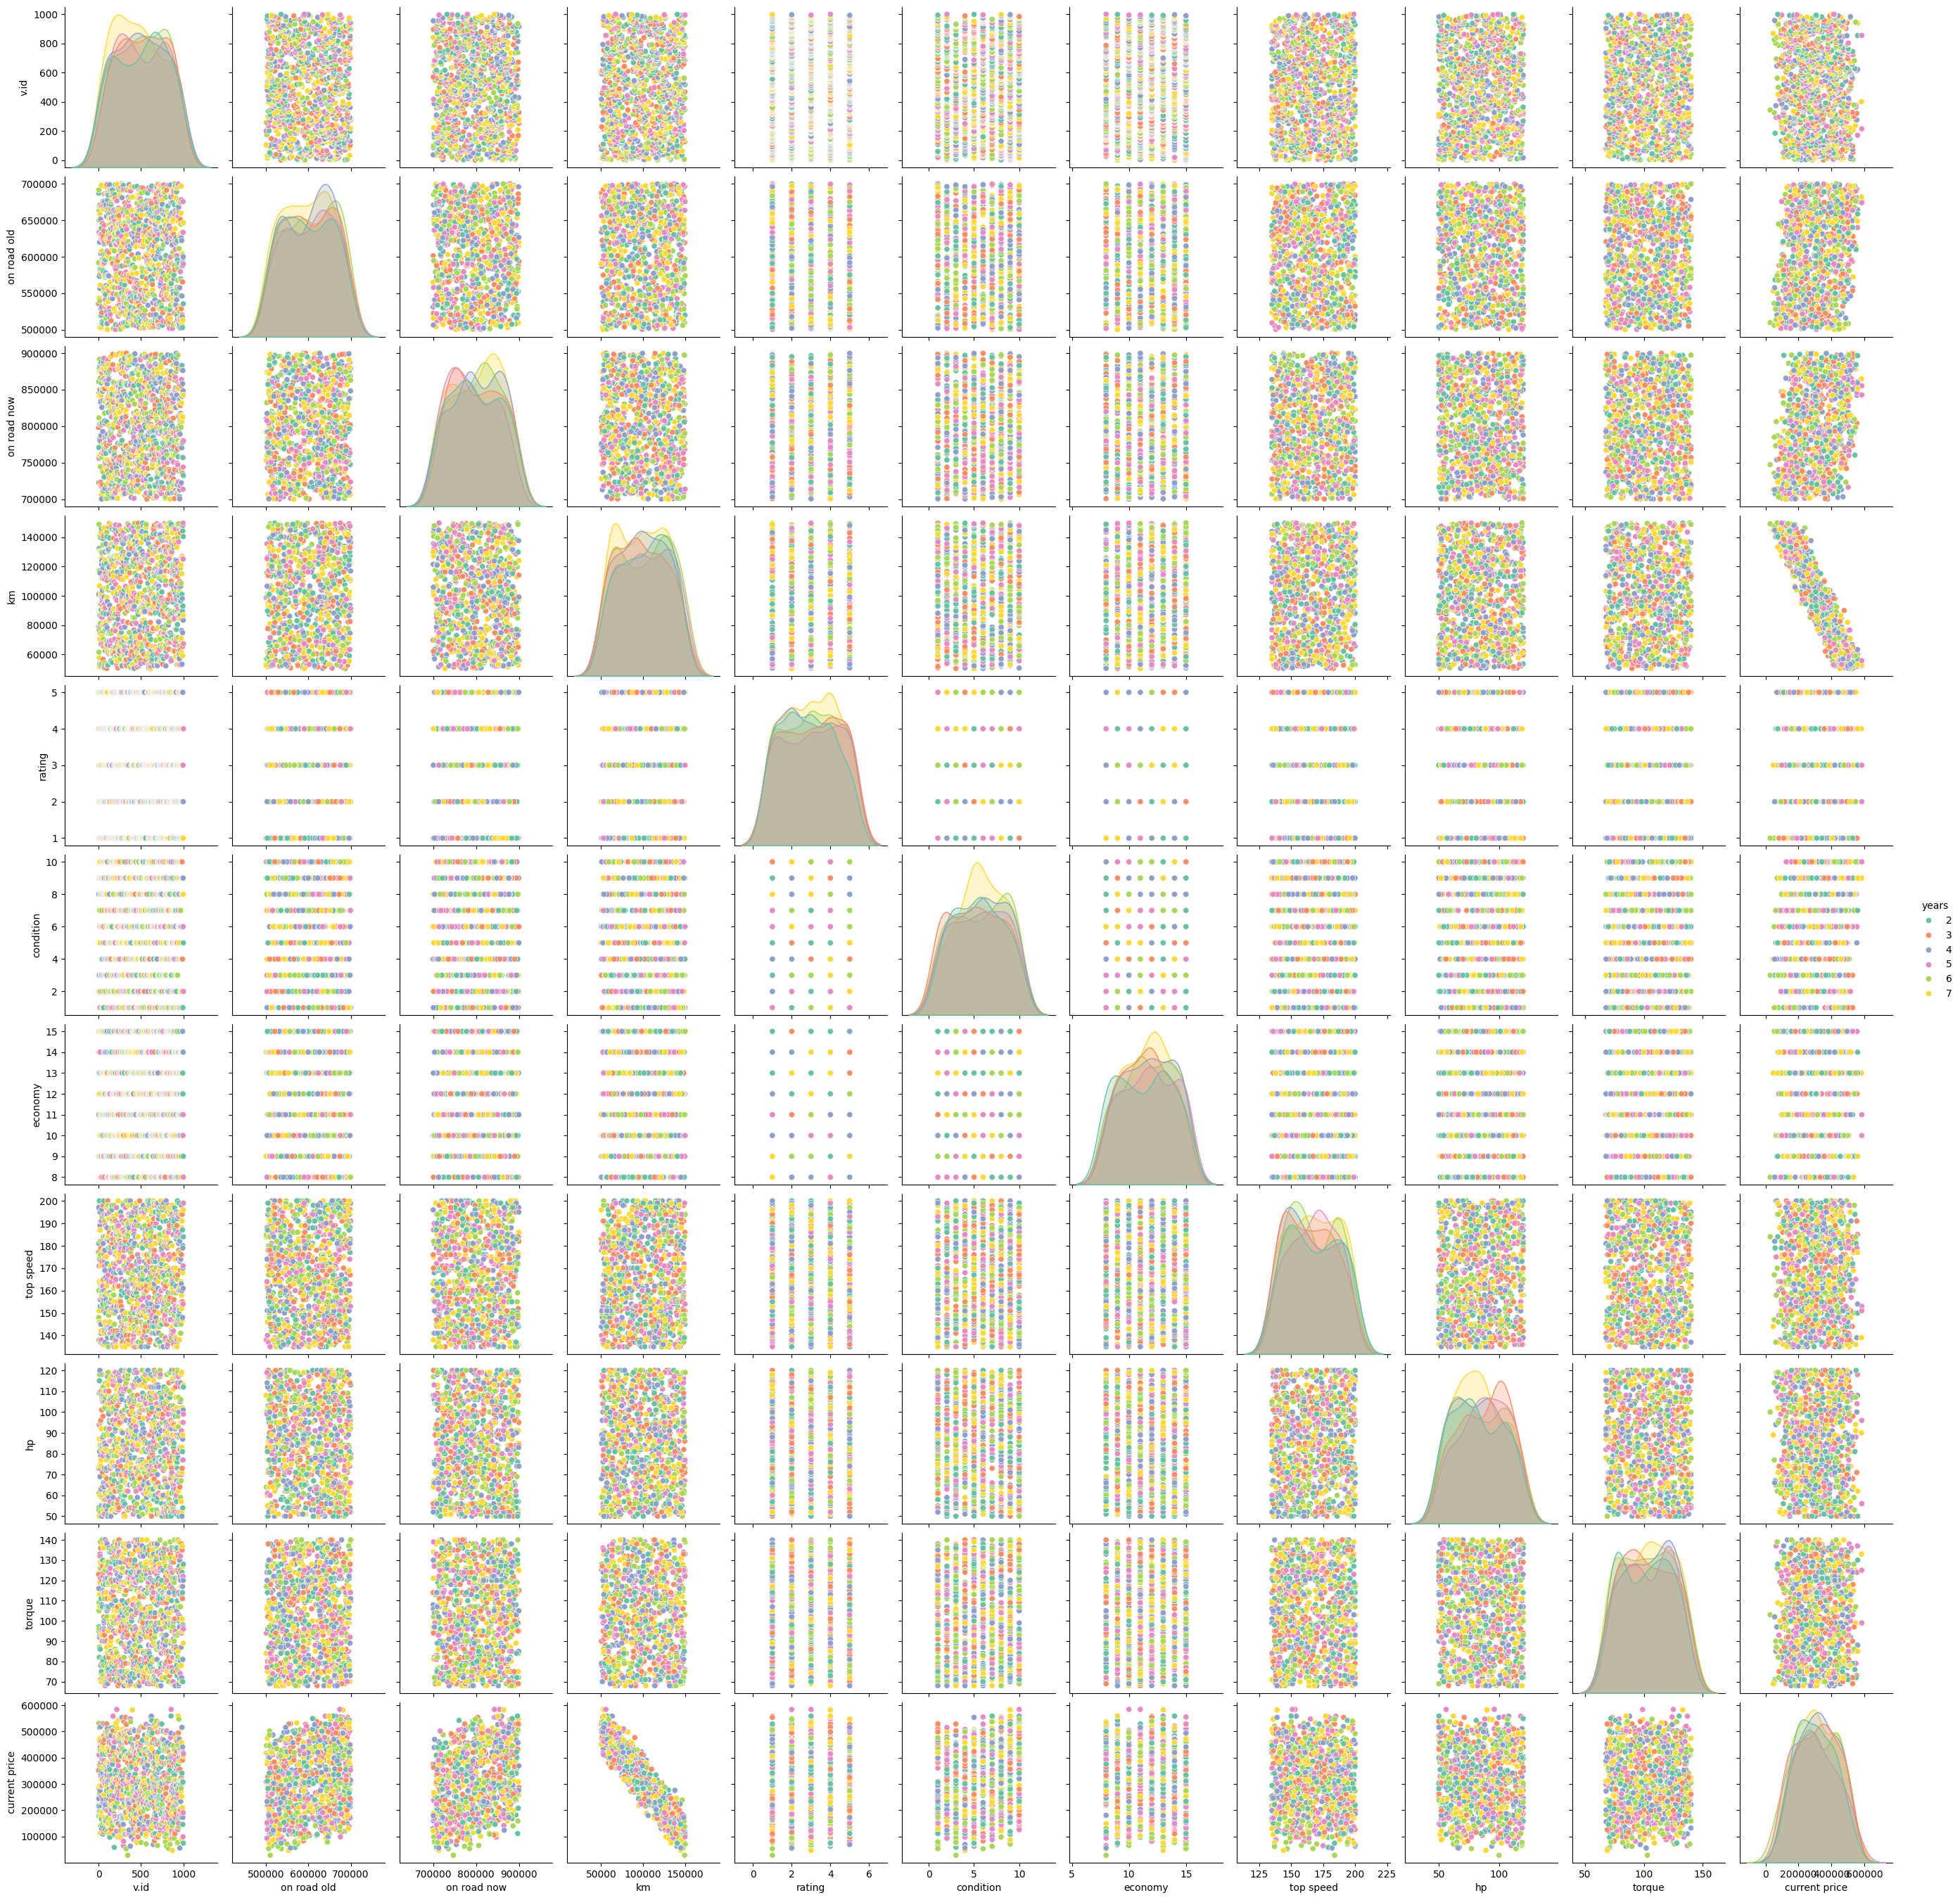

In [33]:
sns.pairplot(data=train, hue="years", palette="Set2")

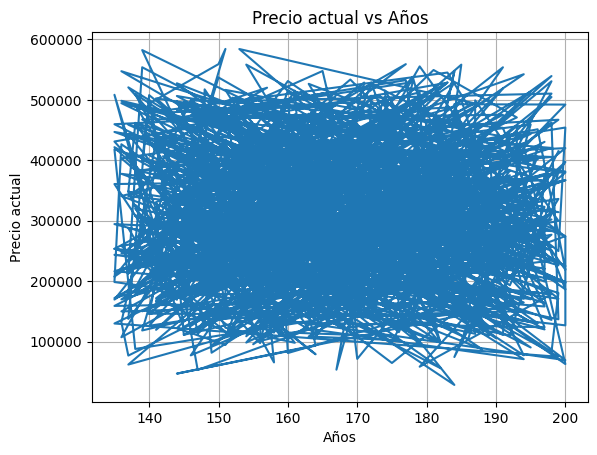

In [34]:
plt.plot(train["top speed"], train["current price"])
plt.title("Precio actual vs Años")
plt.xlabel("Años")
plt.ylabel("Precio actual")
plt.grid(True)
plt.show()

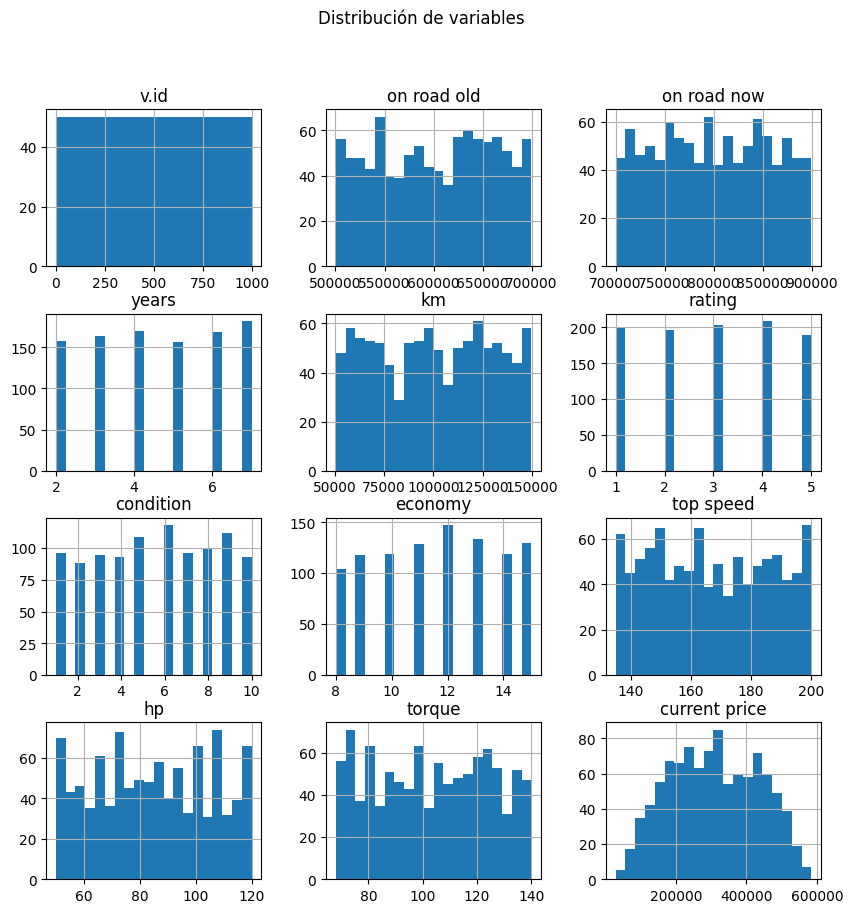

In [35]:
train.hist(figsize=(10,10), bins=20)
plt.suptitle("Distribución de variables")
plt.show()

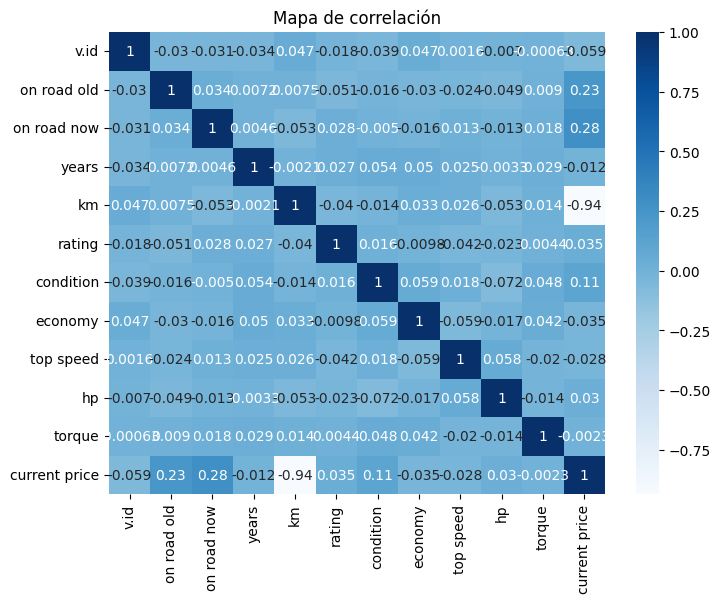

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, cmap='Blues')
plt.title("Mapa de correlación")
plt.show()

In [50]:
#Modelo
normalizer = Normalization() #Normalizador
model = tf.keras.Sequential([
    InputLayer(shape=(8,)),#Espera 8 vectores
    normalizer,#Normaliza datos
    Dense(1),#Crea una capa oculta con 1 neurona de regresión lineal por defecto
    
],name="Mi primer modelo")
model.summary()

Model: "Mi primer modelo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (None, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)